In [68]:
# import 
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns

In [69]:
df = pd.read_csv("../DataScienceDataSets/sales_all.csv")

In [3]:
df.head()

,date,WeekdayNo,Weekday,HolidayFlag,SchoolHolidayFlag,Sales
0,2012-01-01,6,Sun,True,True,117.0
1,2012-01-02,0,Mon,False,True,106.0
2,2012-01-03,1,Tue,False,True,82.0
3,2012-01-04,2,Wed,False,True,70.0
4,2012-01-05,3,Thur,False,True,84.0


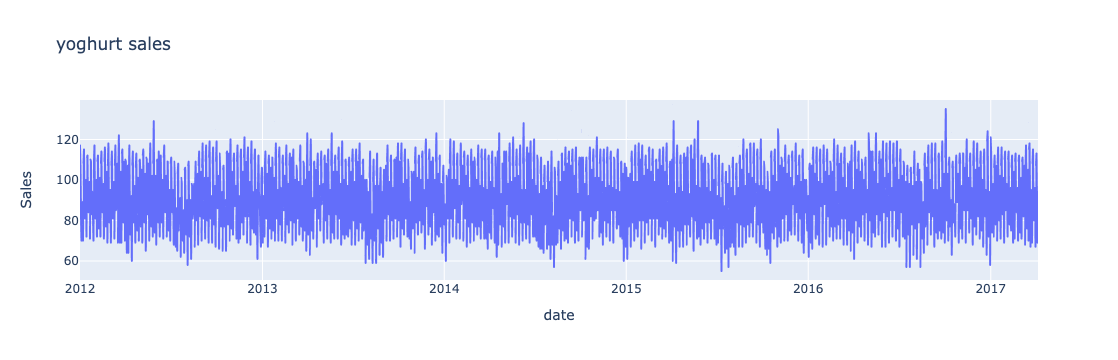

In [13]:
px.line(df, x= "date", y = "Sales" , title='yoghurt sales')


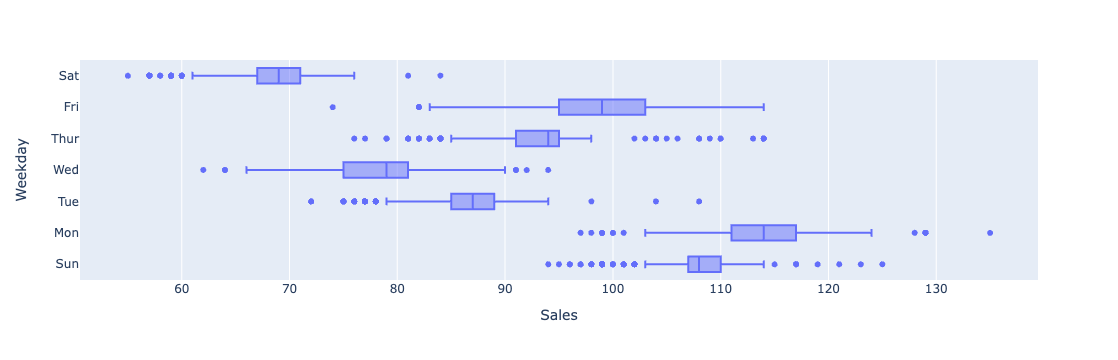

In [17]:
px.box(df, x="Sales" , y = "Weekday")

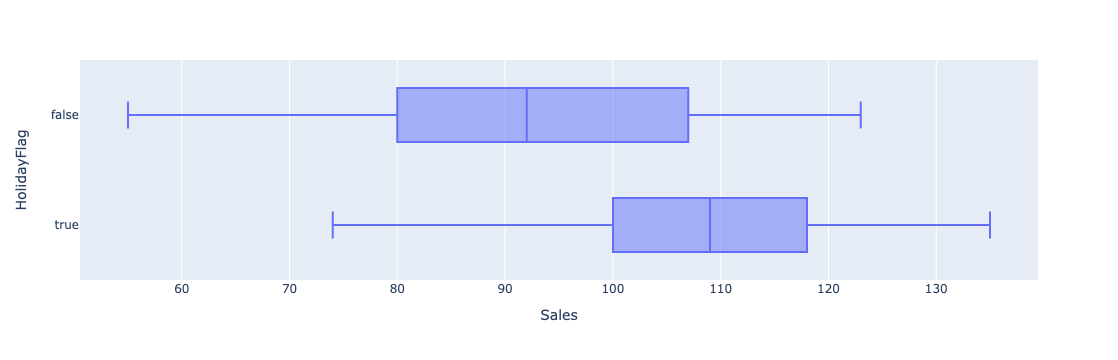

In [18]:
px.box(df, x="Sales" , y = "HolidayFlag")

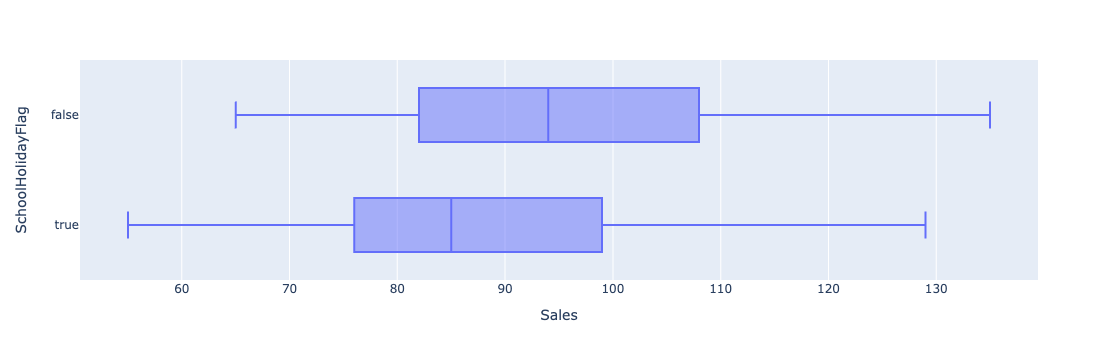

In [19]:
px.box(df, x="Sales" , y = "SchoolHolidayFlag")

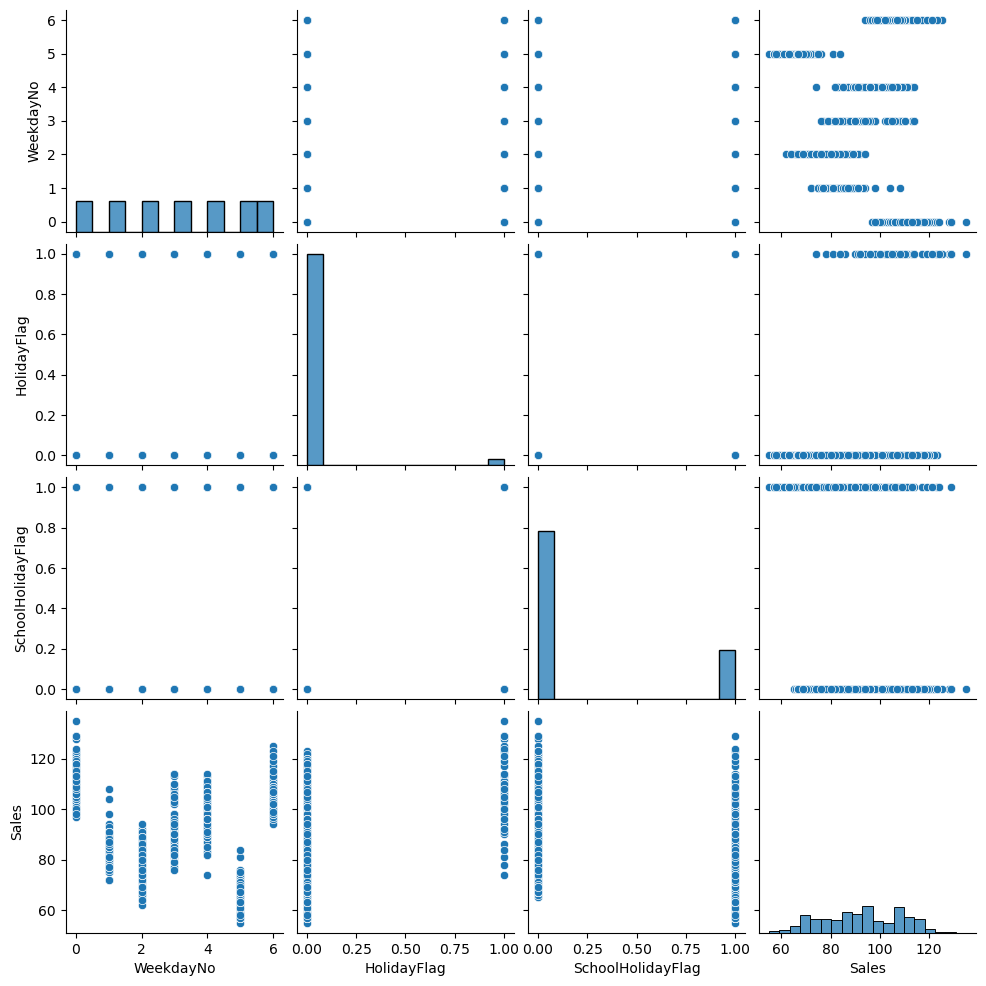

In [29]:
sns.pairplot(df)

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



In [71]:
X = df.iloc[:,1:-1]
X

,WeekdayNo,Weekday,HolidayFlag,SchoolHolidayFlag
0,6,Sun,True,True
1,0,Mon,False,True
2,1,Tue,False,True
3,2,Wed,False,True
4,3,Thur,False,True
...,...,...,...,...
1918,6,Sun,False,False
1919,0,Mon,False,False
1920,1,Tue,False,False
1921,2,Wed,False,False


In [72]:
y = df.Sales
y

0       117.0
1       106.0
2        82.0
3        70.0
4        84.0
        ...  
1918    107.0
1919    113.0
1920     87.0
1921     69.0
1922     94.0
Name: Sales, Length: 1923, dtype: float64

In [73]:
pd.get_dummies(X)

,WeekdayNo,HolidayFlag,SchoolHolidayFlag,Weekday_Fri,Weekday_Mon,Weekday_Sat,Weekday_Sun,Weekday_Thur,Weekday_Tue,Weekday_Wed
0,6,True,True,False,False,False,True,False,False,False
1,0,False,True,False,True,False,False,False,False,False
2,1,False,True,False,False,False,False,False,True,False
3,2,False,True,False,False,False,False,False,False,True
4,3,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
1918,6,False,False,False,False,False,True,False,False,False
1919,0,False,False,False,True,False,False,False,False,False
1920,1,False,False,False,False,False,False,False,True,False
1921,2,False,False,False,False,False,False,False,False,True


In [74]:
X = pd.get_dummies(X)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [76]:
lm = LinearRegression()
lm.fit(X_train, y_train)
lm.score(X_test, y_test)

/Users/kaslibekir/ENTER/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/kaslibekir/ENTER/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/kaslibekir/ENTER/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/kaslibekir/ENTER/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/kaslibekir/ENTER/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecate

0.9615638730223773

In [77]:
lm.intercept_

-92146607268222.25

In [78]:
lm.coef_

array([ 2.68374726e+13,  1.39062500e+01, -7.71099005e+00, -1.52032830e+13,
        9.21466073e+13, -4.20407556e+13, -6.88782282e+13,  1.16341895e+13,
        6.53091347e+13,  3.84716621e+13])

In [79]:
from sklearn.metrics import mean_squared_error

In [80]:
mse = mean_squared_error(lm.predict(X_test),y_test)

/Users/kaslibekir/ENTER/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/kaslibekir/ENTER/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/kaslibekir/ENTER/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/kaslibekir/ENTER/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/Users/kaslibekir/ENTER/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecate

In [65]:
mse

10.942715286279654

In [66]:
import math
math.sqrt(mse) #durchscnittle Abweichung --> root mean squared error

3.3079775220336147

In [67]:
# Vergleich kein Machine Learning
mean_per_Weekday = df.groupby('Weekday').transform('mean').Sales
mse = mean_squared_error(mean_per_Weekday,df.Sales)
math.sqrt(mse) #bessere Performance mit ML

TypeError: agg function failed [how->mean,dtype->object]